#### 분류 모델을 적용해서 분류하고 성능평가하기
##### kn, svm, tree

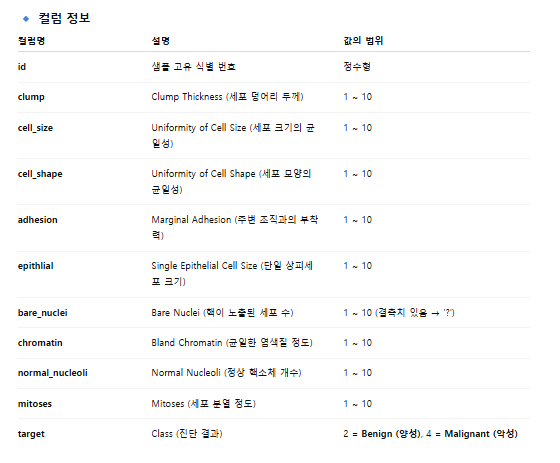

In [25]:
import pandas as pd
import numpy as np

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'target']
np.unique(df.target)

array([2, 4])

In [26]:
# 타겟의 2 4를 0 1로 변경
df.target =  df.target.map({
    2:0,
    4:1
})

In [27]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,target
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [28]:
# df 에 있는 데이터중에 숫자가 아닌 데이터를 찾아서 na 로 설정한다
# na 즉 결측치를 어떻게 처리할까?  - 삭제
df.info()
df.bare_nuclei = pd.to_numeric(df.bare_nuclei, errors='coerce')
df.isna().mean()  # 대략 2%
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  target           699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [29]:
# 데이터 분리
# 7:3
from sklearn.model_selection import train_test_split
X = df.drop(columns=['id','target']).to_numpy()
y = df.target
x_train,x_test,y_train,y_test =  train_test_split(X,y , stratify=y, test_size=0.3, random_state=42)

In [37]:
# 모델선택
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
# 학습
tree.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
# 평가
from sklearn.metrics import classification_report
# 학습한 데이터를 평가
# 학습하지 않은 데이터를 평가
# 두 수치가 차이가 많이 나면 과적합  (학습>평가)  overfitting  과대적합     
# 두 수치가 차이가 많이 나면 과적합  (학습<평가)  underfitting  과소적합        0.05 이상이면 보통 과적합

y_pred = tree.predict(x_train)
print( classification_report(y_train, y_pred) )

y_pred = tree.predict(x_test)
print( classification_report(y_test, y_pred) )


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       311
           1       0.96      0.94      0.95       167

    accuracy                           0.97       478
   macro avg       0.97      0.96      0.96       478
weighted avg       0.97      0.97      0.97       478

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.93      0.93      0.93        72

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier()
svm = SVC()

knn.fit(x_train, y_train)
svm.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print('knn f1-score')
print(classification_report(y_test,y_pred))

print('svm f1-score')
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))


knn f1-score
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.93      0.93      0.93        72

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

svm f1-score
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

